# Understanding Descriptive Statistics

Import the necessary libraries here:

In [15]:
import numpy as np
import pandas as pd 
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [16]:
def rand ():
    rolls = []

    for i in range (0,10):
        rolls.append(random.randint(1,6))
    return pd.DataFrame(rolls, columns=['result'])

rolls = rand()

#### 2.- Plot the results sorted by value.

<AxesSubplot:>

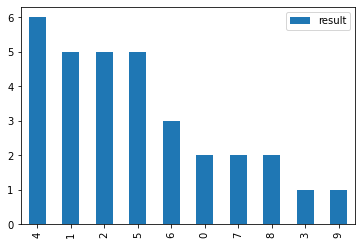

In [17]:
rolls.sort_values(by=['result'],ascending=False, inplace=True)

rolls.plot(kind='bar', y=['result'])

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:>

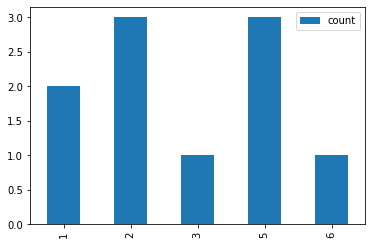

In [18]:

rolls_list = list(rolls['result'])


freq_dict = {}

for i in rolls_list:
    freq_dict[i] = rolls_list.count(i)


count = pd.DataFrame(pd.Series(freq_dict), columns=['count'])


sorted = count.sort_index()

sorted.plot(kind='bar', y=['count'])

In [19]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [20]:
def mean_calc (x):
    count = 0

    for i in x:
        count += i

    return count/len(x)


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [21]:
new_df = rolls.groupby('result').agg({'result':'count'}).rename(columns={'result':'freq'}).reset_index()

n_s = new_df['freq'].sum(axis=0)

mean_3 = (new_df['result'] * new_df['freq']).sum() / n_s


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [56]:
def med(x): 
    median = 0 
    

    if len(x)%2 != 0:
        median = x[(len(x)/2) + 0.5]
    
    else: 
        median = (x[int(len(x)/2)] + x[int(len(x)/2) - 1]) / 2

    return median 


# the commented out code was to make sure i could convert dataframe of dices to list and apply the function

# sorted_rolls = rolls.sort_values(by=['result'], ascending= False)

# lst = list(sorted_rolls['result'])


# new_med = med(lst)
# new_med
    


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [23]:
data = pd.read_csv('/Users/tiagoornelas/Documents/Ironhack/Labs/Descriptive-Stats/data/roll_the_dice_hundred.csv')

data.sort_values(['value'], ascending = False)

,Unnamed: 0,roll,value
99,99,99,6
36,36,36,6
23,23,23,6
24,24,24,6
90,90,90,6
...,...,...,...
89,89,89,1
47,47,47,1
73,73,73,1
56,56,56,1


In [24]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [25]:
data.apply(mean_calc)


Unnamed: 0    49.50
roll          49.50
value          3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [26]:
lst = list(data['value'])

freq_dict = {}

for i in lst:
    freq_dict[i] = lst.count(i)


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

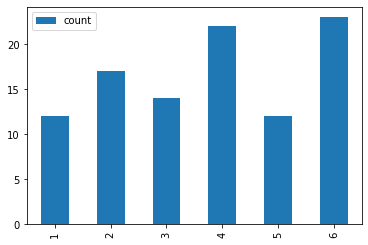

In [27]:

count = pd.DataFrame(pd.Series(freq_dict), columns=['count'])
sorted = count.sort_index()

sorted.plot(kind='bar', y=['count'])

In [28]:
"""
6 most rolled, not enough trials to understand all dices have same probabilty, and over more trials the same frequency.
"""

'\n6 most rolled, not enough trials to understand all dices have same probabilty, and over more trials the same frequency.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:>

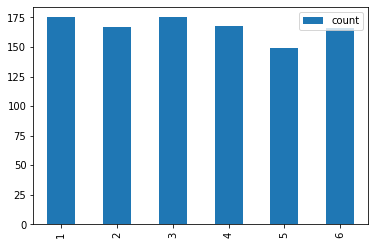

In [29]:
data = pd.read_csv('/Users/tiagoornelas/Documents/Ironhack/Labs/Descriptive-Stats/data/roll_the_dice_thousand.csv')

lst = list(data['value'])

freq_dict = {}

for i in lst:
    freq_dict[i] = lst.count(i)


count = pd.DataFrame(pd.Series(freq_dict), columns=['count'])
sorted = count.sort_index()

sorted.plot(kind='bar', y=['count'])

In [30]:
"""
Results are more evenly distributed
"""

'\nResults are more evenly distributed\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <BarContainer object of 10 artists>)

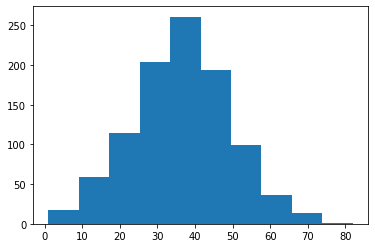

In [31]:
age = pd.read_csv('/Users/tiagoornelas/Documents/Ironhack/Labs/Descriptive-Stats/data/ages_population.csv')

plt.hist(age)

## mean = 33-37, stdev = 10-15

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [32]:
display(age['observation'].mean())

age['observation'].std()

36.56

12.81649962597677

In [33]:
"""
yes
"""

'\nyes\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <BarContainer object of 10 artists>)

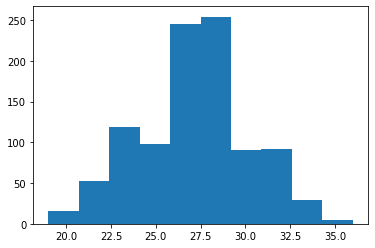

In [34]:
age = pd.read_csv('/Users/tiagoornelas/Documents/Ironhack/Labs/Descriptive-Stats/data/ages_population2.csv')

plt.hist(age)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [35]:
"""
higher standard deviation, lower mean. 
"""



'\nhigher standard deviation, lower mean. \n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [36]:
display(age['observation'].mean())
age['observation'].std()

27.155

2.9698139326891835

In [37]:
"""
much lower standard deviation and mean """

'\nmuch lower standard deviation and mean '

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <BarContainer object of 10 artists>)

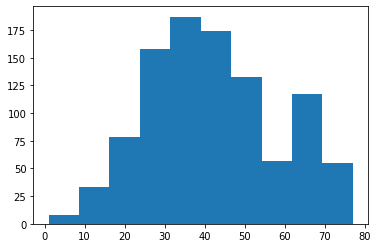

In [38]:
age = pd.read_csv('/Users/tiagoornelas/Documents/Ironhack/Labs/Descriptive-Stats/data/ages_population3.csv')

plt.hist(age)


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [39]:
display(age['observation'].mean())
age['observation'].std()

41.989

16.14470595986593

In [40]:
"""
higher mean, less symetric distribution, lower frequency of results (lower n of trials)

"""

'\nhigher mean, less symetric distribution, lower frequency of results (lower n of trials_\n\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [54]:
q1 = age.quantile(0.25)
q2 = age.quantile(0.50)
q3 = age.quantile(0.75)


print(q1['observation'],q2['observation'],q3['observation'])

30.0 40.0 53.0


In [42]:
"""
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [43]:
# your code here

In [44]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [45]:
# your code here

In [46]:
"""
your comments here
"""

'\nyour comments here\n'